In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import math
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense
import math
# univariate bidirectional lstm
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional

from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
log_ddf=pd.read_csv("/content/drive/MyDrive/AI-HPA_Model/data/log_df.csv")
log_ddf.drop([0], inplace=True)
log_ddf.reset_index(inplace=True)
log_ddf.drop(['index'], axis=1, inplace=True)

In [4]:
log_ddf.isnull().sum()

datetime    0
ip          0
dtype: int64

In [5]:
log_ddf.min()['ip'], log_ddf.max()['ip']

(1.0, 1982.0)

In [6]:
# cpu 전체 사용량으로 변환(0.021~41.622)
log_ddf["cpu_usage"]=log_ddf["ip"]*0.021

In [7]:
log_ddf.min()['cpu_usage'], log_ddf.max()['cpu_usage']

(0.021, 41.622)

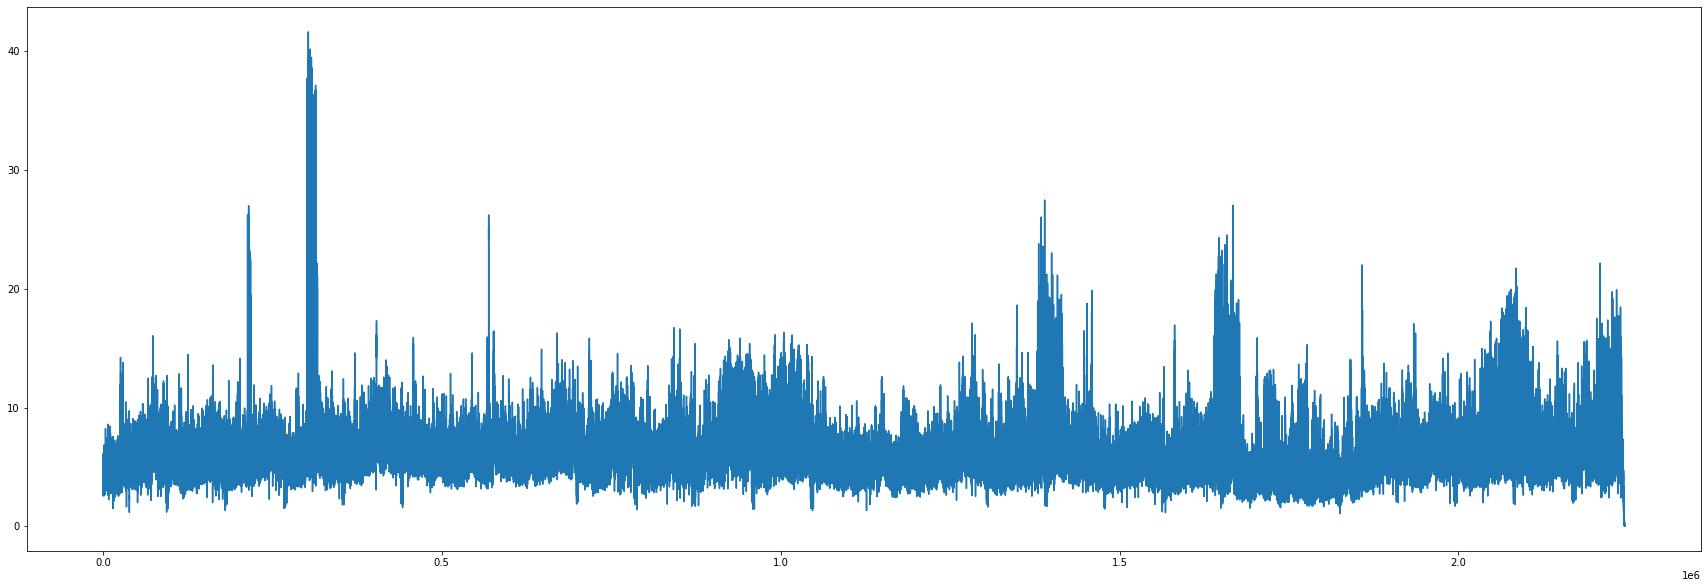

In [8]:
plt.figure(figsize=(30,10))

plt.plot(log_ddf['cpu_usage'])

plt.show()

In [9]:
# max_usage에 따른 Pod 개수 산출
max_usage=0.5000 # ms
use_ratio=0.8 # 최대 사용 비율
log_ddf["pods"]=-1

for i in range(len(log_ddf["cpu_usage"])):
  log_ddf["pods"][i]=math.ceil(log_ddf["cpu_usage"][i]/(max_usage*use_ratio))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
log_ddf.min()['pods'], log_ddf.max()['pods']

(1, 105)

In [11]:
log_ddf.to_csv("/content/drive/MyDrive/AI-HPA_Model/data/log_df_pods.csv")

In [12]:
log_ddf=pd.read_csv("/content/drive/MyDrive/AI-HPA_Model/data/log_df_pods.csv").drop(["Unnamed: 0"], axis=1)

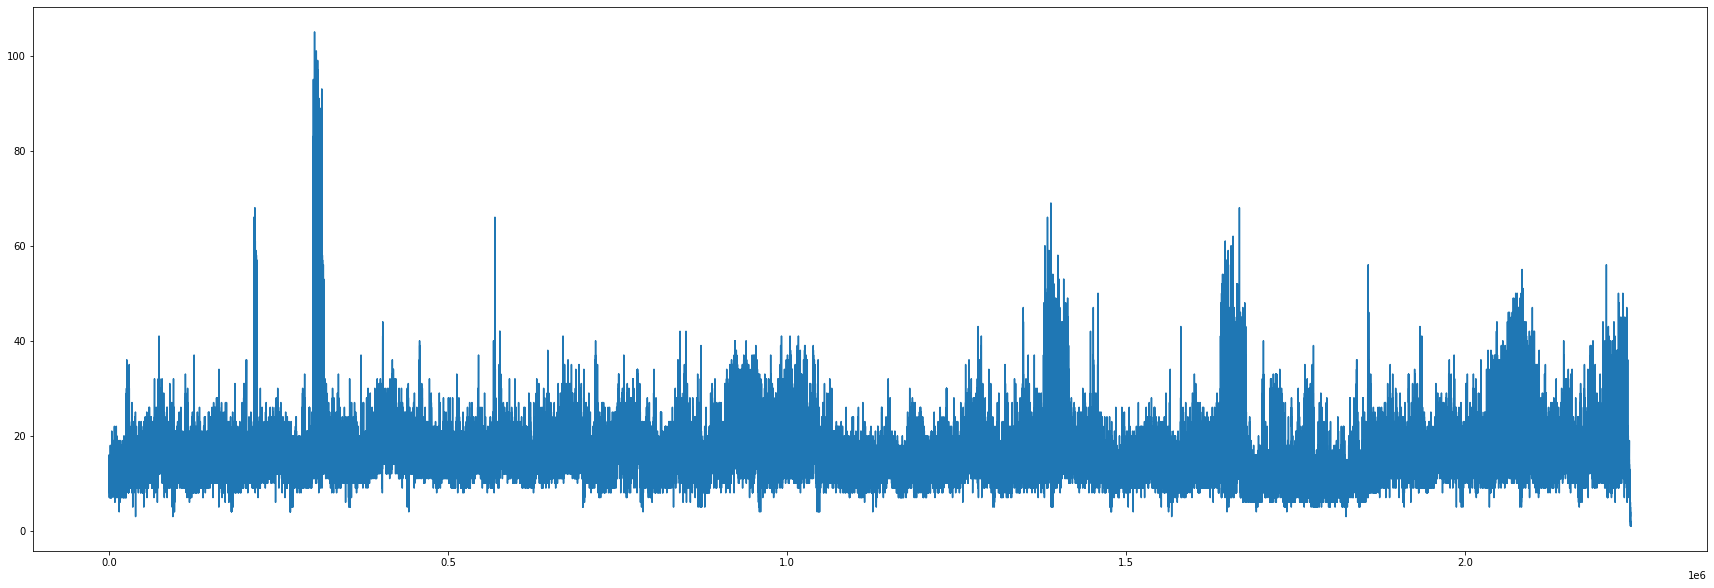

In [13]:
plt.figure(figsize=(30,10))

plt.plot(log_ddf['pods'])

plt.show()

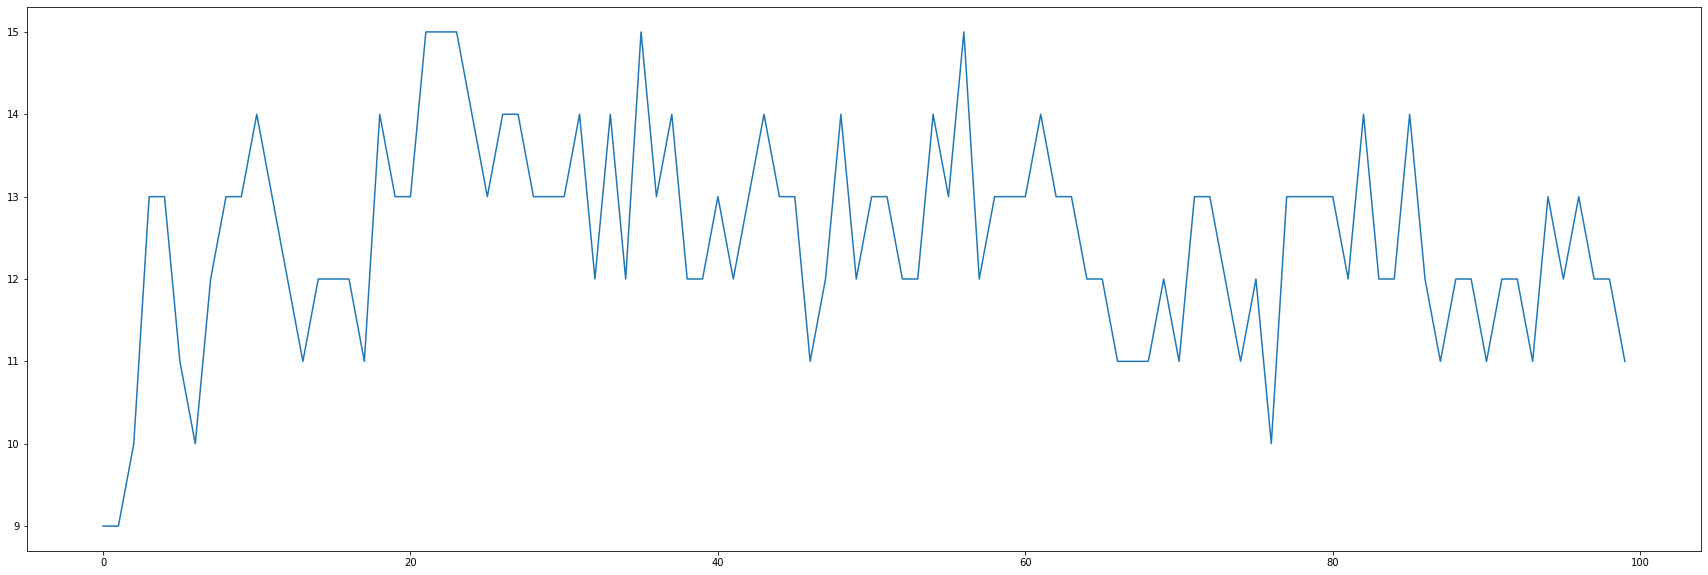

In [14]:
plt.figure(figsize=(30,10))

plt.plot(log_ddf['pods'][:100])

plt.show()

In [15]:
df=pd.read_csv("/content/drive/MyDrive/AI-HPA_Model/data/log_df_pods_slow.csv").drop(["Unnamed: 0"], axis=1)
df_origin=pd.read_csv("/content/drive/MyDrive/AI-HPA_Model/data/log_df_pods_slow.csv").drop(["Unnamed: 0"], axis=1)

In [16]:
RRS=0.7
for i in range(len(df_origin)-1):
  # 0.7 곱한 차이로 간다,, df_origin인 이유는, 앞에서 0.7 곱한걸로 바뀐 게 영향이 생겨서..ㅇㅇ
  if df_origin['pods'][i+1]-df_origin['pods'][i]>0:
    df['pods'][i+1]=df['pods'][i]+int((df['pods'][i+1]-df['pods'][i])*RRS)
  else:
    df['pods'][i+1]=df['pods'][i]-int((df['pods'][i]-df['pods'][i+1])*RRS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


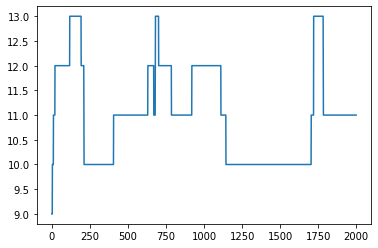

In [17]:
df['pods'][:2000].plot()

In [ ]:
df.to_csv("/content/drive/MyDrive/AI-HPA_Model/data/log_df_pods_slow.csv")